# EcoType: Forest Cover Type Prediction
## Notebook 2 — Exploratory Data Analysis (EDA)

This notebook explores:
- Target class distribution
- Feature distributions
- Correlation analysis
- Feature relationships
- Key insights for modeling


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(style="whitegrid")


## 1. Load Preprocessed Dataset


In [13]:
df = pd.read_csv("data/cleaned_data.csv")
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen


## 2. Dataset Overview


In [14]:
print("Shape:", df.shape)
df.info()
df.describe().T


Shape: (145890, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  int64  
 1   Aspect                              145890 non-null  int64  
 2   Slope                               145890 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64  
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64  
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64  
 6   Hillshade_9am                       145890 non-null  int64  
 7   Hillshade_Noon                      145890 non-null  int64  
 8   Hillshade_3pm                       145890 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64  
 10  Wilderness_Area_1                   145890 non-null  float64
 11  Wilder

,count,mean,std,min,25%,50%,75%,max
Elevation,145890.0,2874.458949,210.801279,1863.0,2747.0,2909.0,3004.0,3849.0
Aspect,145890.0,141.127418,107.719296,0.0,54.0,108.0,217.0,360.0
Slope,145890.0,11.925574,6.319326,0.0,7.0,11.0,15.0,61.0
Horizontal_Distance_To_Hydrology,145890.0,251.824738,192.473899,0.0,95.0,212.0,362.0,1343.0
Vertical_Distance_To_Hydrology,145890.0,34.554322,41.215776,-146.0,7.0,23.0,51.0,554.0
Horizontal_Distance_To_Roadways,145890.0,3313.827541,1687.779953,0.0,1848.0,3420.0,4673.0,7117.0
Hillshade_9am,145890.0,217.368106,21.590298,0.0,207.0,222.0,232.0,254.0
Hillshade_Noon,145890.0,224.874748,16.084851,99.0,216.0,226.0,236.0,254.0
Hillshade_3pm,145890.0,139.788203,31.311690,0.0,121.0,140.0,159.0,248.0
Horizontal_Distance_To_Fire_Points,145890.0,3044.958105,1761.882341,0.0,1608.0,2713.0,4478.0,7173.0


## 3. Target Variable Distribution


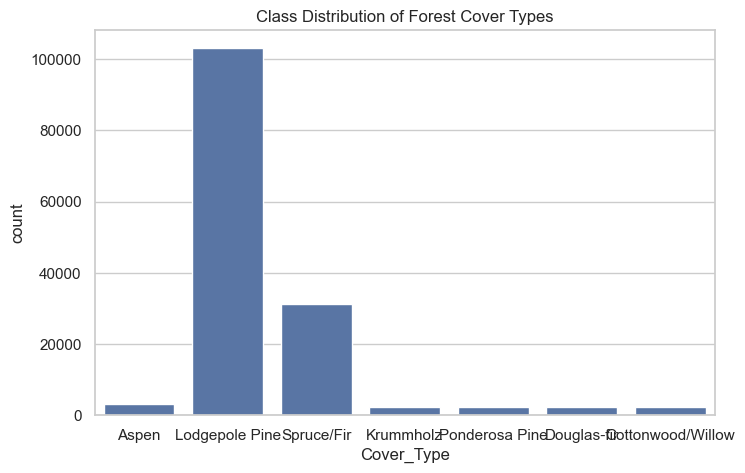

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x="Cover_Type", data=df)
plt.title("Class Distribution of Forest Cover Types")
plt.show()



## 4. Feature Distribution (Univariate Analysis)


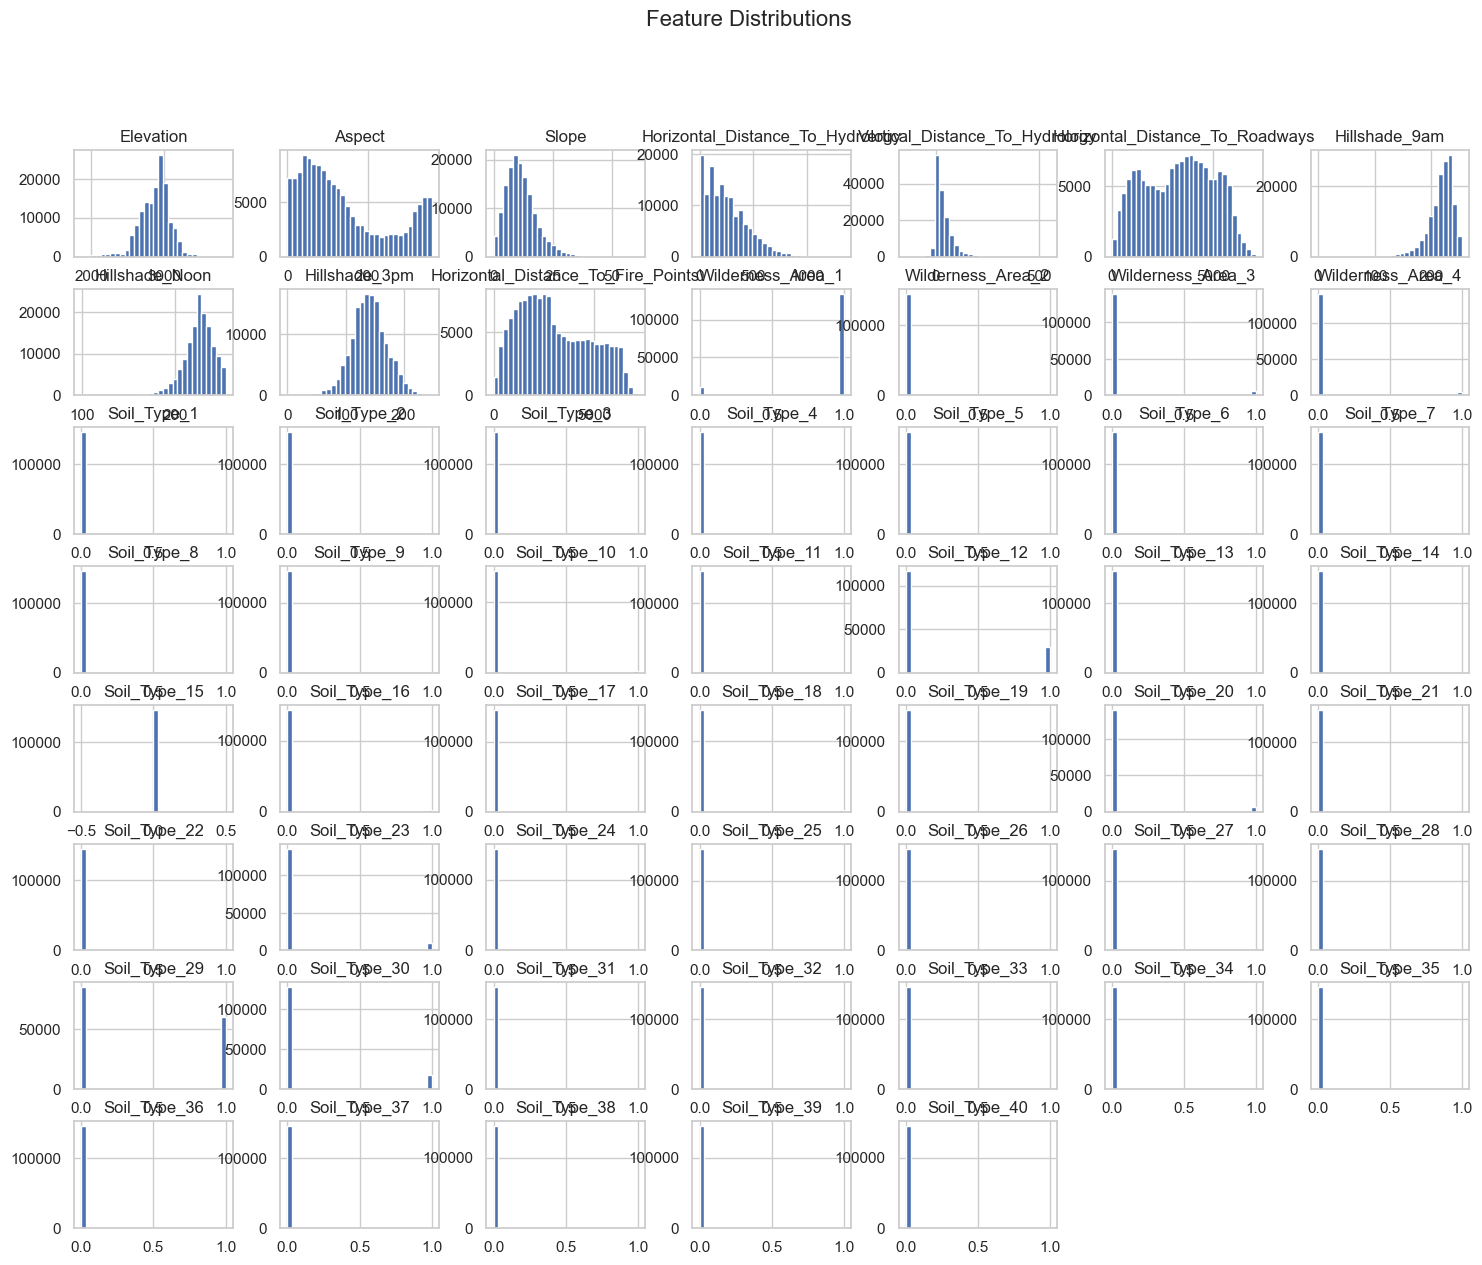

In [16]:
df.drop("Cover_Type", axis=1).hist(figsize=(18,14), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


## 5. Boxplots for Outlier Detection


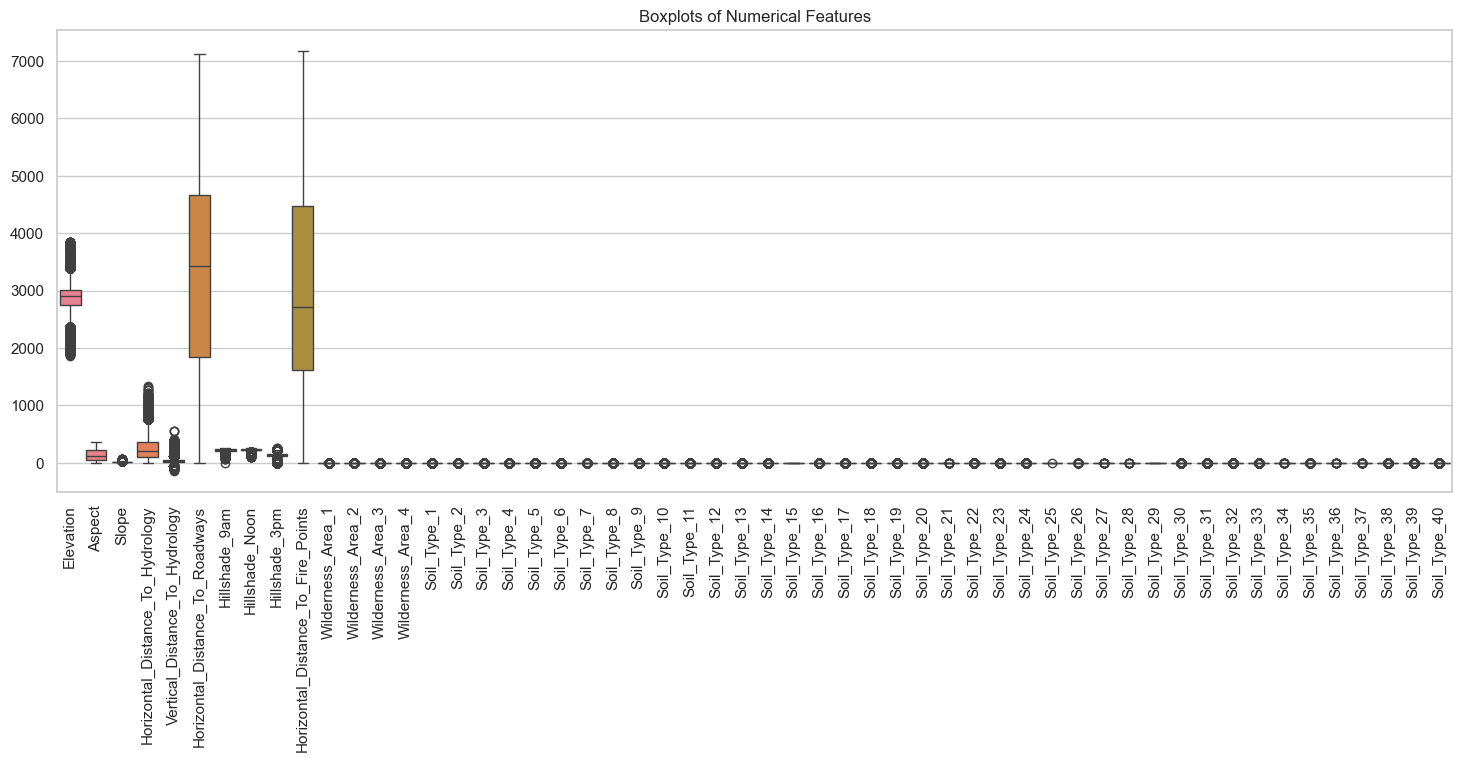

In [17]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df.drop("Cover_Type", axis=1))
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Features")
plt.show()


## 6. Correlation Heatmap


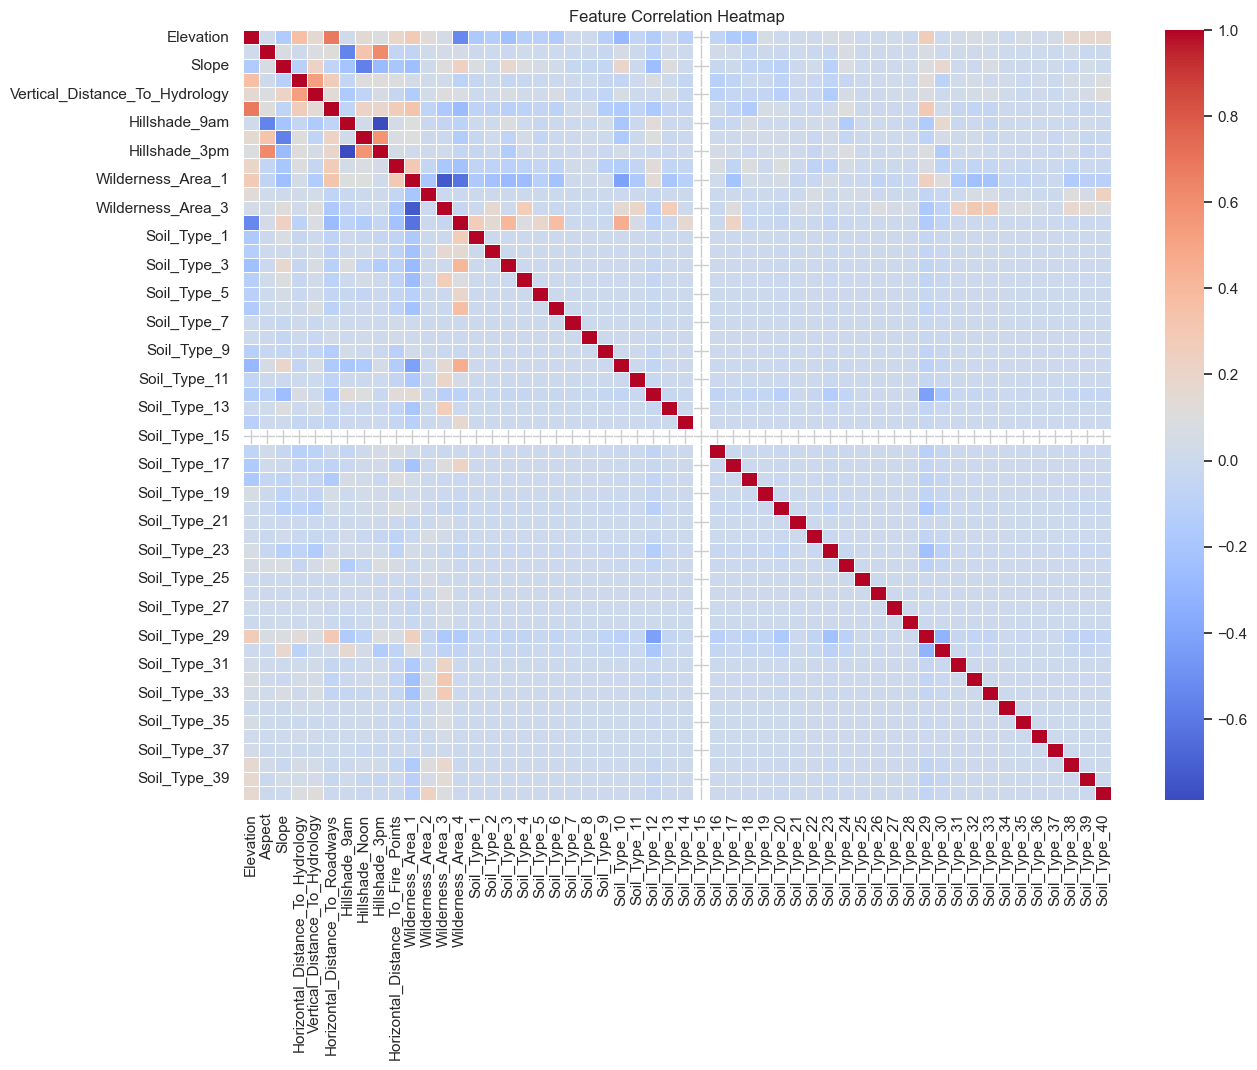

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df.drop("Cover_Type", axis=1).corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## 7. Feature vs Target Relationships


## 8. Pairwise Feature Relationships (Sampled Data)


## 9. Key Insights from EDA


### 🔍 Observations:

- Cover_Type classes are now balanced after SMOTE preprocessing.
- Elevation, Horizontal_Distance_To_Roadways, and Hillshade_Noon show strong influence on forest cover types.
- Some features are moderately correlated, but no extreme multicollinearity detected.
- Distributions are mostly normalized after preprocessing transformations.
- Feature vs target boxplots show good class separability for tree-based models.

These insights justify using ensemble tree models like Random Forest and XGBoost.
